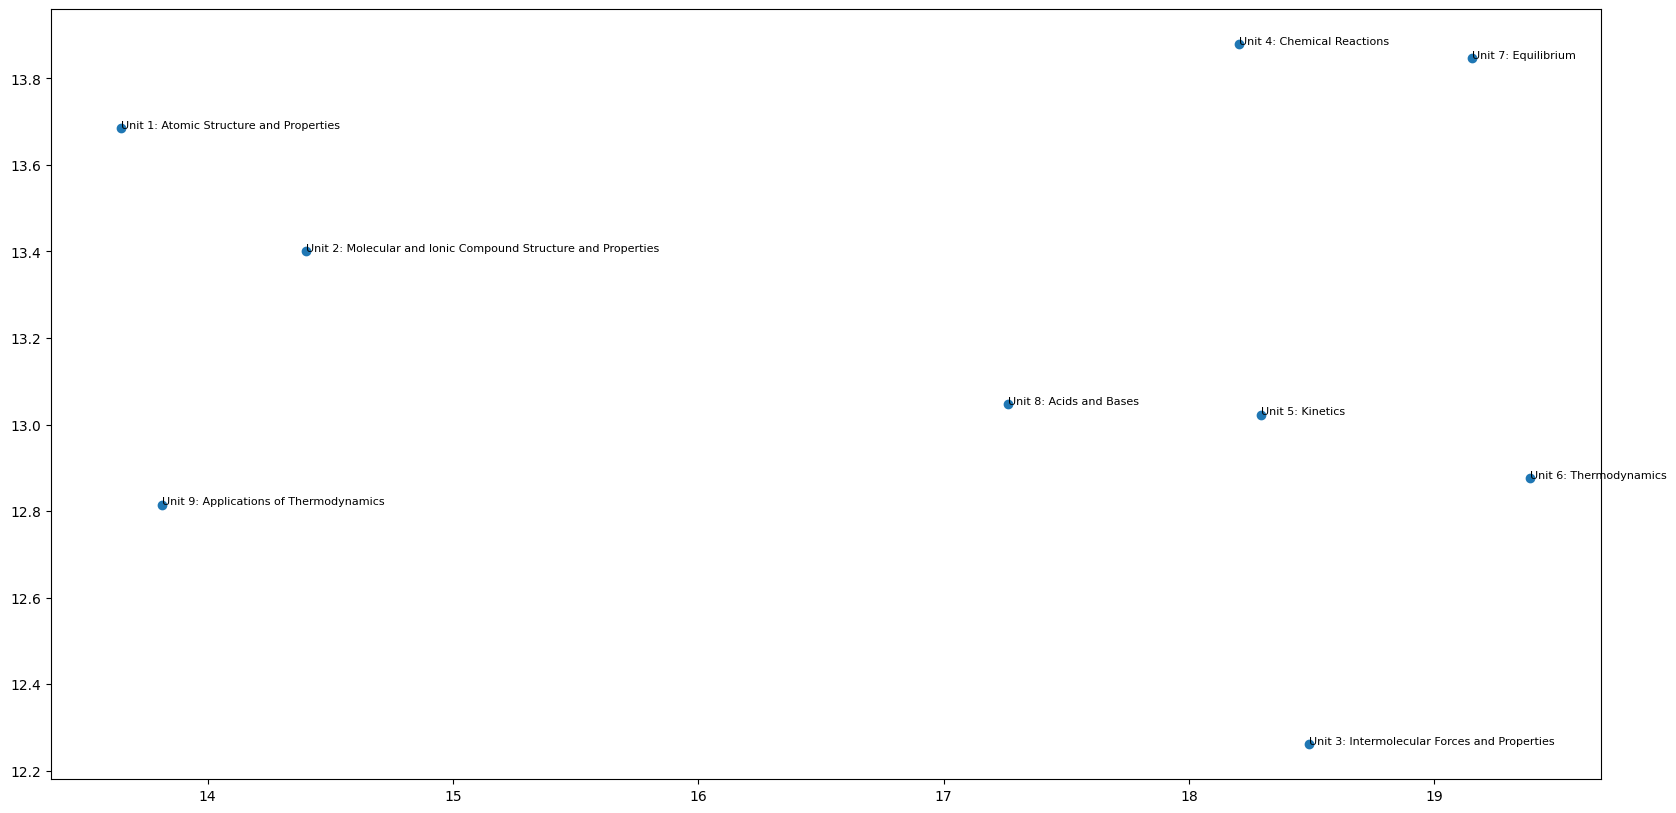

In [2]:
import os
import pandas as pd
from openai import OpenAI
import numpy as np
from dotenv import load_dotenv
from umap import UMAP
import matplotlib.pyplot as plt

# Load the API key from the .env file
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Check if the API key is loaded successfully
if api_key is None:
    raise ValueError("OpenAI API key is missing. Make sure it is set in the environment variable OPENAI_API_KEY.")

client = OpenAI(api_key=api_key)  # Initialize the OpenAI client

def get_embeddings_batch(inputs):
    # Call the OpenAI API to get the embeddings for a batch of inputs
    response = client.embeddings.create(
        input=inputs,
        model="text-embedding-3-large"
    )

    # Extract the embeddings
    embeddings = np.array([item.embedding for item in response.data])

    return embeddings

# Input for which class units do you want mapped
csv_file_path = input("Enter the path to the CSV file: ")

# Read the CSV file

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Creating labels from "Unit Number" and "Unit Title" columns
labels = df["Unit Number"].astype(str) + ': ' + df["Unit Title"].tolist()

# Creating descriptions by concatenating relevant information, for example, "Key Topics"
descriptions = df["Key Topics"].tolist()

embeddings = get_embeddings_batch(descriptions)


# Set hyperparameters for UMAP. Try playing around with them
n_neighbors = 4
min_dist = 0.3
n_components = 2
metric = 'cosine'

# Initialize the UMAP model
umap = UMAP(    
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric
)

# Fit the UMAP model to the embeddings
reduced_embeddings = umap.fit_transform(embeddings)

# Plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, text in enumerate(labels):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], text, fontsize=8)
plt.gcf().set_size_inches(20, 10)
plt.show()
